<a href="https://colab.research.google.com/github/quirkyqwertydcp/public-liquid/blob/main/L1_MC_Dominance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycoingecko
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.pyplot import figure

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
st = datetime(2017,1,1,0,0)
start_time = st.timestamp()
end_time = datetime.today().timestamp()

In [ ]:
df = pd.DataFrame()

In [ ]:
data = cg.get_coin_market_chart_range_by_id(id='ethereum',vs_currency='usd',from_timestamp=start_time,to_timestamp=end_time)
df1 = pd.DataFrame(data['market_caps'])
df1[0] = pd.to_datetime(df1[0], unit = 'ms')

df = df1
df.columns = ['date', 'ethereum']
df['sum'] = df['ethereum']

for token in ['binancecoin', 'matic-network', 'avalanche-2', 'solana', 'fantom', 'cosmos', 'terra-luna', 'polkadot', 'near', 'boba-network', 'aurora-near']:
  data = cg.get_coin_market_chart_range_by_id(id=token,vs_currency='usd',from_timestamp=start_time,to_timestamp=end_time)
  df1 = pd.DataFrame(data['market_caps'])
  df1[0] = pd.to_datetime(df1[0], unit = 'ms')
  df1.columns = ['date', token]
  df = df.merge(df1, how='left', on='date')
  df[token] = df[token].fillna(0)
  df['sum'] += df[token]

df

,date,ethereum,sum,binancecoin,matic-network,avalanche-2,solana,fantom,cosmos,terra-luna,polkadot,near,boba-network,aurora-near
0,2017-01-01,7.056152e+08,7.056152e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,2017-01-02,7.318175e+08,7.318175e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,2017-01-03,8.428865e+08,8.428865e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,2017-01-04,9.610389e+08,9.610389e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,2017-01-05,8.862965e+08,8.862965e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,2021-12-18,4.622676e+11,7.128393e+11,8.862200e+10,1.464370e+10,2.714215e+10,5.400629e+10,3.564657e+09,6.047767e+09,2.478787e+10,2.641607e+10,4.907343e+09,4.338892e+08,0.0
1812,2021-12-19,4.711956e+11,7.316194e+11,9.015771e+10,1.535125e+10,2.815409e+10,5.639384e+10,3.610382e+09,6.534315e+09,2.761799e+10,2.726000e+10,4.898382e+09,4.458390e+08,0.0
1813,2021-12-20,4.673962e+11,7.257258e+11,8.913259e+10,1.543386e+10,2.647888e+10,5.579051e+10,3.657346e+09,6.330402e+09,2.923629e+10,2.652971e+10,5.276420e+09,4.636458e+08,0.0
1814,2021-12-21,4.713192e+11,7.283622e+11,8.867598e+10,1.487303e+10,2.788247e+10,5.406192e+10,3.513616e+09,6.171231e+09,3.034264e+10,2.593168e+10,5.115428e+09,4.750973e+08,0.0


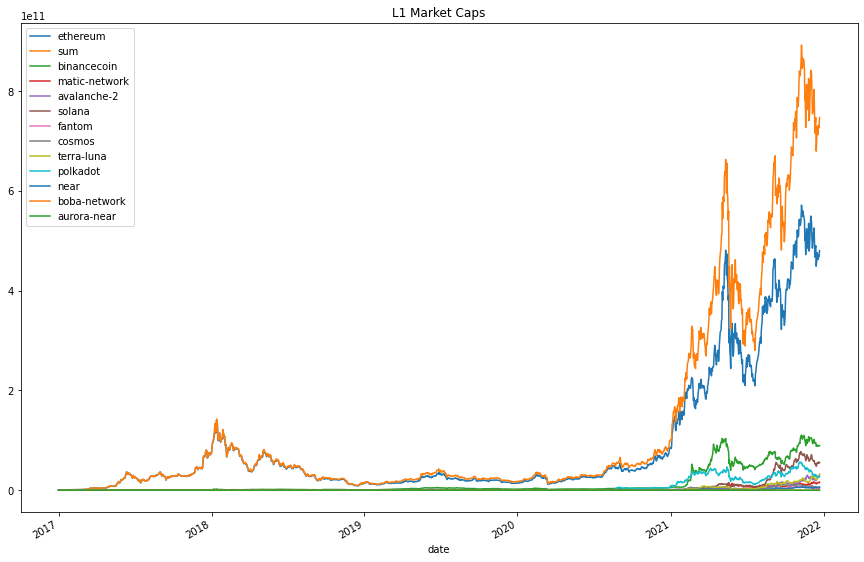

In [ ]:
df.set_index('date').plot(figsize=(15,10), title="L1 Market Caps")

# L1 MC Dominance Table

In [ ]:
df2 = df.copy()

ls = ['ethereum', 'binancecoin', 'matic-network', 'avalanche-2', 'solana', 'fantom', 'cosmos', 'terra-luna', 'polkadot', 'near', 'boba-network', 'aurora-near']

for token in ls:
  df2[token] = df2[token]/df2['sum']

df2

,date,ethereum,sum,binancecoin,matic-network,avalanche-2,solana,fantom,cosmos,terra-luna,polkadot,near,boba-network,aurora-near
0,2017-01-01,1.000000,7.056152e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2017-01-02,1.000000,7.318175e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,2017-01-03,1.000000,8.428865e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,2017-01-04,1.000000,9.610389e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,2017-01-05,1.000000,8.862965e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,2021-12-18,0.648488,7.128393e+11,0.124323,0.020543,0.038076,0.075762,0.005001,0.008484,0.034773,0.037058,0.006884,0.000609,0.0
1812,2021-12-19,0.644045,7.316194e+11,0.123230,0.020983,0.038482,0.077081,0.004935,0.008931,0.037749,0.037260,0.006695,0.000609,0.0
1813,2021-12-20,0.644040,7.257258e+11,0.122819,0.021267,0.036486,0.076875,0.005040,0.008723,0.040286,0.036556,0.007271,0.000639,0.0
1814,2021-12-21,0.647094,7.283622e+11,0.121747,0.020420,0.038281,0.074224,0.004824,0.008473,0.041659,0.035603,0.007023,0.000652,0.0


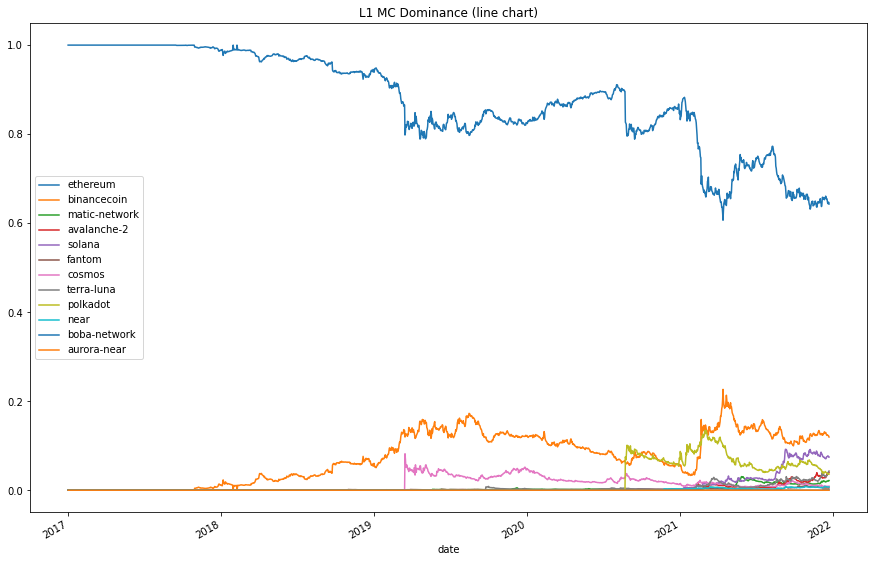

In [ ]:
df2[['date'] + ls].set_index('date').plot(figsize=(15,10), title="L1 MC Dominance (line chart)").figure.savefig('foo.jpeg')

# L1 MC Dominance (stacked area chart)


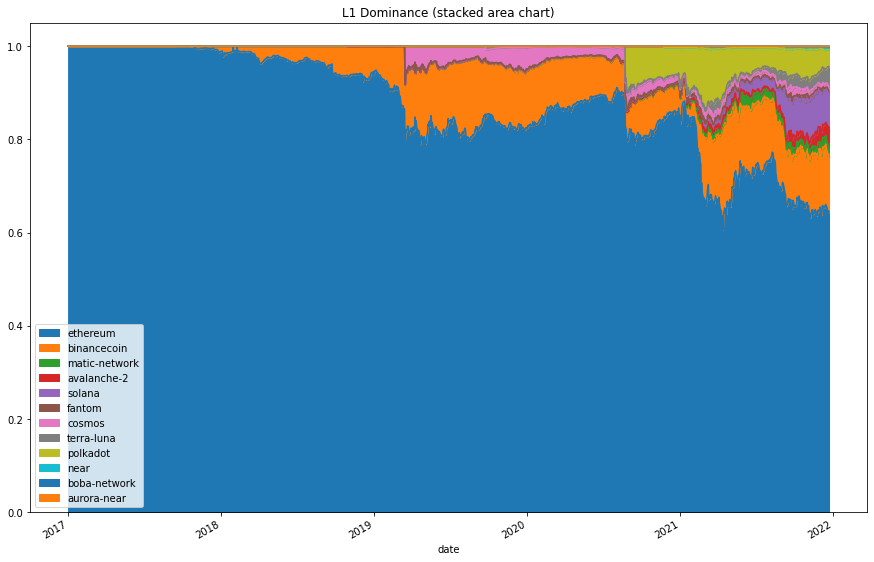

In [ ]:
df2[['date'] + ls].set_index('date').plot(figsize=(15,10), kind="area", stacked=True, title="L1 Dominance (stacked area chart)").figure.savefig('foo-area.jpeg')

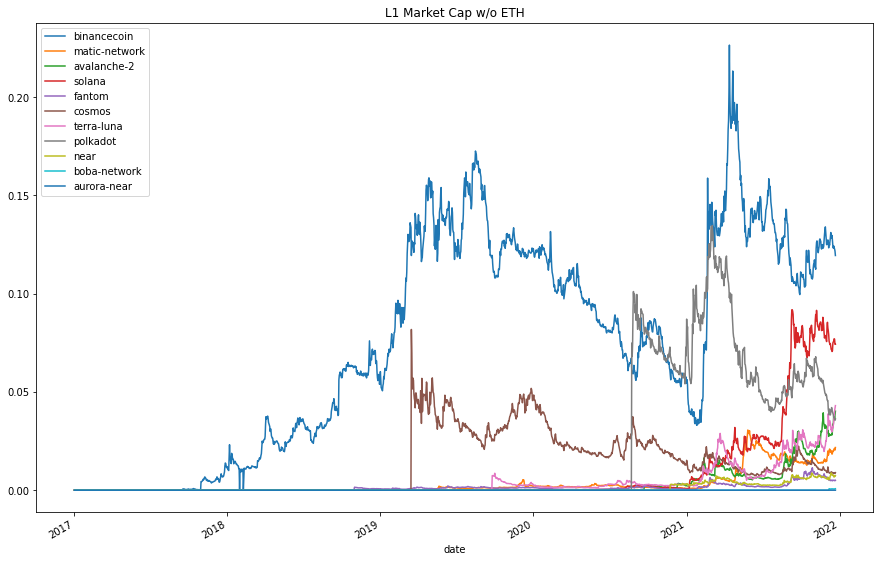

In [ ]:
ls2 = ['binancecoin', 'matic-network', 'avalanche-2', 'solana', 'fantom', 'cosmos', 'terra-luna', 'polkadot', 'near', 'boba-network', 'aurora-near']
df2[['date'] + ls2].set_index('date').plot(figsize=(15,10), title="L1 Market Cap w/o ETH").figure.savefig('foo2.jpeg')

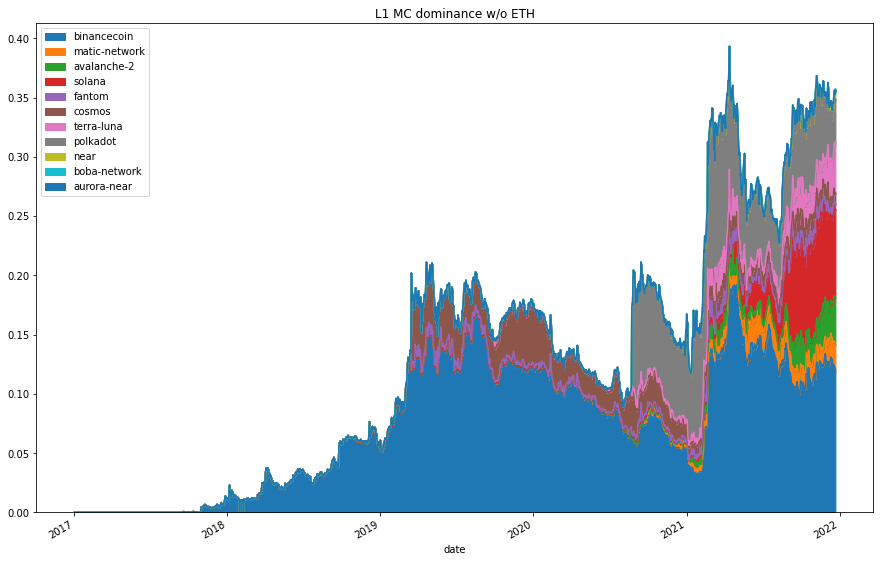

In [ ]:
df2[['date'] + ls2].set_index('date').plot(figsize=(15,10), kind="area", stacked=True, title="L1 MC dominance w/o ETH").figure.savefig('foo2-area.jpeg')